In [331]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import jieba as jb
import re

!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

--2021-08-25 06:06:15--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  5.89MB/s    in 1.6s    

2021-08-25 06:06:17 (5.89 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [332]:
filename = 'https://github.com/medicinely/machine-learning-practice/blob/master/test.xls?raw=true'
data = pd.read_excel(filename)
data = data[['三级分类','报事描述']]
df = data
df.columns = ['cat','review']
df = df[df['cat']!='其他']

In [333]:
# c1 = data[(df['class']=='户内设计')]
# c2 = df[df['class']=='车库/车位']
# c = pd.concat([c1,c2])
# print(c1[:5])
# print(c2[:5])
print("在 cat 列中总共有 %d 个空值." % df['cat'].isnull().sum())
print("在 review 列中总共有 %d 个空值." % df['review'].isnull().sum())
[df.isnull().values==True]
df = df[pd.notnull(df['review'])]
df[:5]

在 cat 列中总共有 0 个空值.
在 review 列中总共有 16 个空值.


,cat,review
2,户内设计,080投诉：客户反馈：屋里面所有的空调洞都不合理，管家告知是没有办法整改，同样是业主为什么别...
3,公区设计,北区后门人行出入口不合理，不方便推婴儿车或者轮椅人员得出行。可以改为下图的形式
4,公区设计,080投诉：登记业主反馈：买的是三楼的房子但是给的二楼，要求尽快处理回电
5,公区设计,080投诉：登记业主反馈：洋房外面有一个平台，楼上扔垃圾下来都会堆在那儿，销售当时并没有告知...
7,公区设计,我周一的投诉一直没有人来联系我，请问这是龙湖对业主的服务态度吗


In [334]:
d = {'cat':df['cat'].value_counts().index, 'count': df['cat'].value_counts()}
df_cat = pd.DataFrame(data=d).reset_index(drop=True)
df_cat

,cat,count
0,公区设计,268
1,户内设计,253
2,园林景观,82
3,信息泄露,51
4,户内精装,42
5,车库/车位,31
6,不利因素,25
7,降价,21
8,市政配套,11
9,广告推销,9


<Figure size 500x350 with 0 Axes>

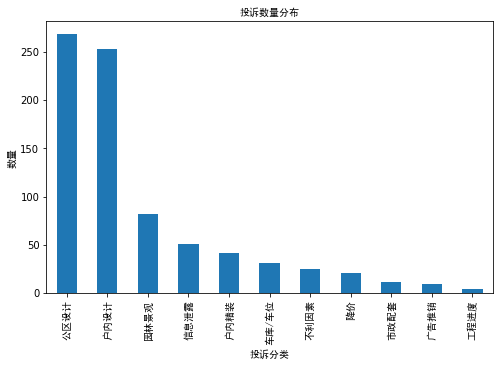

In [335]:
plt.figure(figsize=(10,7), dpi=50)
df_cat.plot(x='cat', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("投诉数量分布", fontproperties=zhfont)
plt.ylabel('数量', fontsize=18, fontproperties=zhfont)
plt.xlabel('投诉分类', fontsize=18, fontproperties=zhfont)
plt.xticks(fontproperties=zhfont)
plt.show()

In [336]:
df['cat_id'] = df['cat'].factorize()[0]
cat_id_df = df[['cat', 'cat_id']].drop_duplicates().sort_values('cat_id').reset_index(drop=True)
cat_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['cat_id', 'cat']].values)
# df.sample(10)
cat_id_df

,cat,cat_id
0,户内设计,0
1,公区设计,1
2,园林景观,2
3,广告推销,3
4,信息泄露,4
5,户内精装,5
6,不利因素,6
7,车库/车位,7
8,市政配套,8
9,降价,9


In [337]:
#定义删除除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line
 
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 

stopwords = np.loadtxt("https://raw.githubusercontent.com/tongzm/ml-python/master/chineseStopWords.txt",dtype='str')


In [338]:
#删除除字母,数字，汉字以外的所有符号
df['clean_review'] = df['review'].apply(remove_punctuation)
df.sample(10)

,cat,review,cat_id,clean_review
1056,工程进度,为什么森镜没有工程进度更新，业主怎么知道建设进度呢？,10,为什么森镜没有工程进度更新业主怎么知道建设进度呢
59,园林景观,北区大门2楼没喷泉不灵动，墙上也没灯光。南北区细节确实南区更胜一筹！毋庸置疑！失望,2,北区大门2楼没喷泉不灵动墙上也没灯光南北区细节确实南区更胜一筹毋庸置疑失望
798,户内设计,阳台尺寸小于合同签订户型图，虚假宣传,0,阳台尺寸小于合同签订户型图虚假宣传
375,园林景观,北区大草坪旁靠马路有绿植物，请按沙盘的效果还原。,2,北区大草坪旁靠马路有绿植物请按沙盘的效果还原
957,户内设计,飘窗、立面报建图差异（原报建图显示为三层大线条铝板，现场为涂料）。,0,飘窗立面报建图差异原报建图显示为三层大线条铝板现场为涂料
691,户内设计,350投诉：客户反馈：厕所设计不合理，浴室没有玻璃隔断，客户告知有些户型有，有些户型没有，客...,0,350投诉客户反馈厕所设计不合理浴室没有玻璃隔断客户告知有些户型有有些户型没有客户表示既然合...
891,户内设计,景观阳台顶严重超过自然层高，合同并未说明，导致房屋严重渗漏 ，无任何人联系解决,0,景观阳台顶严重超过自然层高合同并未说明导致房屋严重渗漏无任何人联系解决
817,公区设计,后门设计太小，没有人脸识别，为小区进出主要通道,1,后门设计太小没有人脸识别为小区进出主要通道
39,车库/车位,080投诉：地产投诉：之前多次来电反馈，客户是新房入住2周，就已经反灌水两次了，客户表示上次...,7,080投诉地产投诉之前多次来电反馈客户是新房入住2周就已经反灌水两次了客户表示上次来电报事过...
597,公区设计,C1U享家在线投诉：龙湖三千庭顶楼消防栓的位置设计不合理，立在住户家门口的，询问设计师怎么想...,1,C1U享家在线投诉龙湖三千庭顶楼消防栓的位置设计不合理立在住户家门口的询问设计师怎么想的询问...


In [339]:
#分词，并过滤停用词
df['cut_review'] = df['clean_review'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df.head()

,cat,review,cat_id,clean_review,cut_review
2,户内设计,080投诉：客户反馈：屋里面所有的空调洞都不合理，管家告知是没有办法整改，同样是业主为什么别...,0,080投诉客户反馈屋里面所有的空调洞都不合理管家告知是没有办法整改同样是业主为什么别的业主可...,080 投诉 客户 反馈 屋里 面 空调 洞 不合理 管家 告知 没有 办法 整改 同样 业...
3,公区设计,北区后门人行出入口不合理，不方便推婴儿车或者轮椅人员得出行。可以改为下图的形式,1,北区后门人行出入口不合理不方便推婴儿车或者轮椅人员得出行可以改为下图的形式,北区 后门 人行 出入口 不合理 方便 推 婴儿车 轮椅 人员 出行 改为 下图 形式
4,公区设计,080投诉：登记业主反馈：买的是三楼的房子但是给的二楼，要求尽快处理回电,1,080投诉登记业主反馈买的是三楼的房子但是给的二楼要求尽快处理回电,080 投诉 登记 业主 反馈 买 三楼 房子 二楼 要求 尽快 处理 回电
5,公区设计,080投诉：登记业主反馈：洋房外面有一个平台，楼上扔垃圾下来都会堆在那儿，销售当时并没有告知...,1,080投诉登记业主反馈洋房外面有一个平台楼上扔垃圾下来都会堆在那儿销售当时并没有告知这个情况...,080 投诉 登记 业主 反馈 洋房 外面 一个 平台 楼上 扔 垃圾 下来 会 堆 销售 ...
7,公区设计,我周一的投诉一直没有人来联系我，请问这是龙湖对业主的服务态度吗,1,我周一的投诉一直没有人来联系我请问这是龙湖对业主的服务态度吗,周一 投诉 一直 没有 人来 联系 请问 这是 龙湖 业主 服务态度


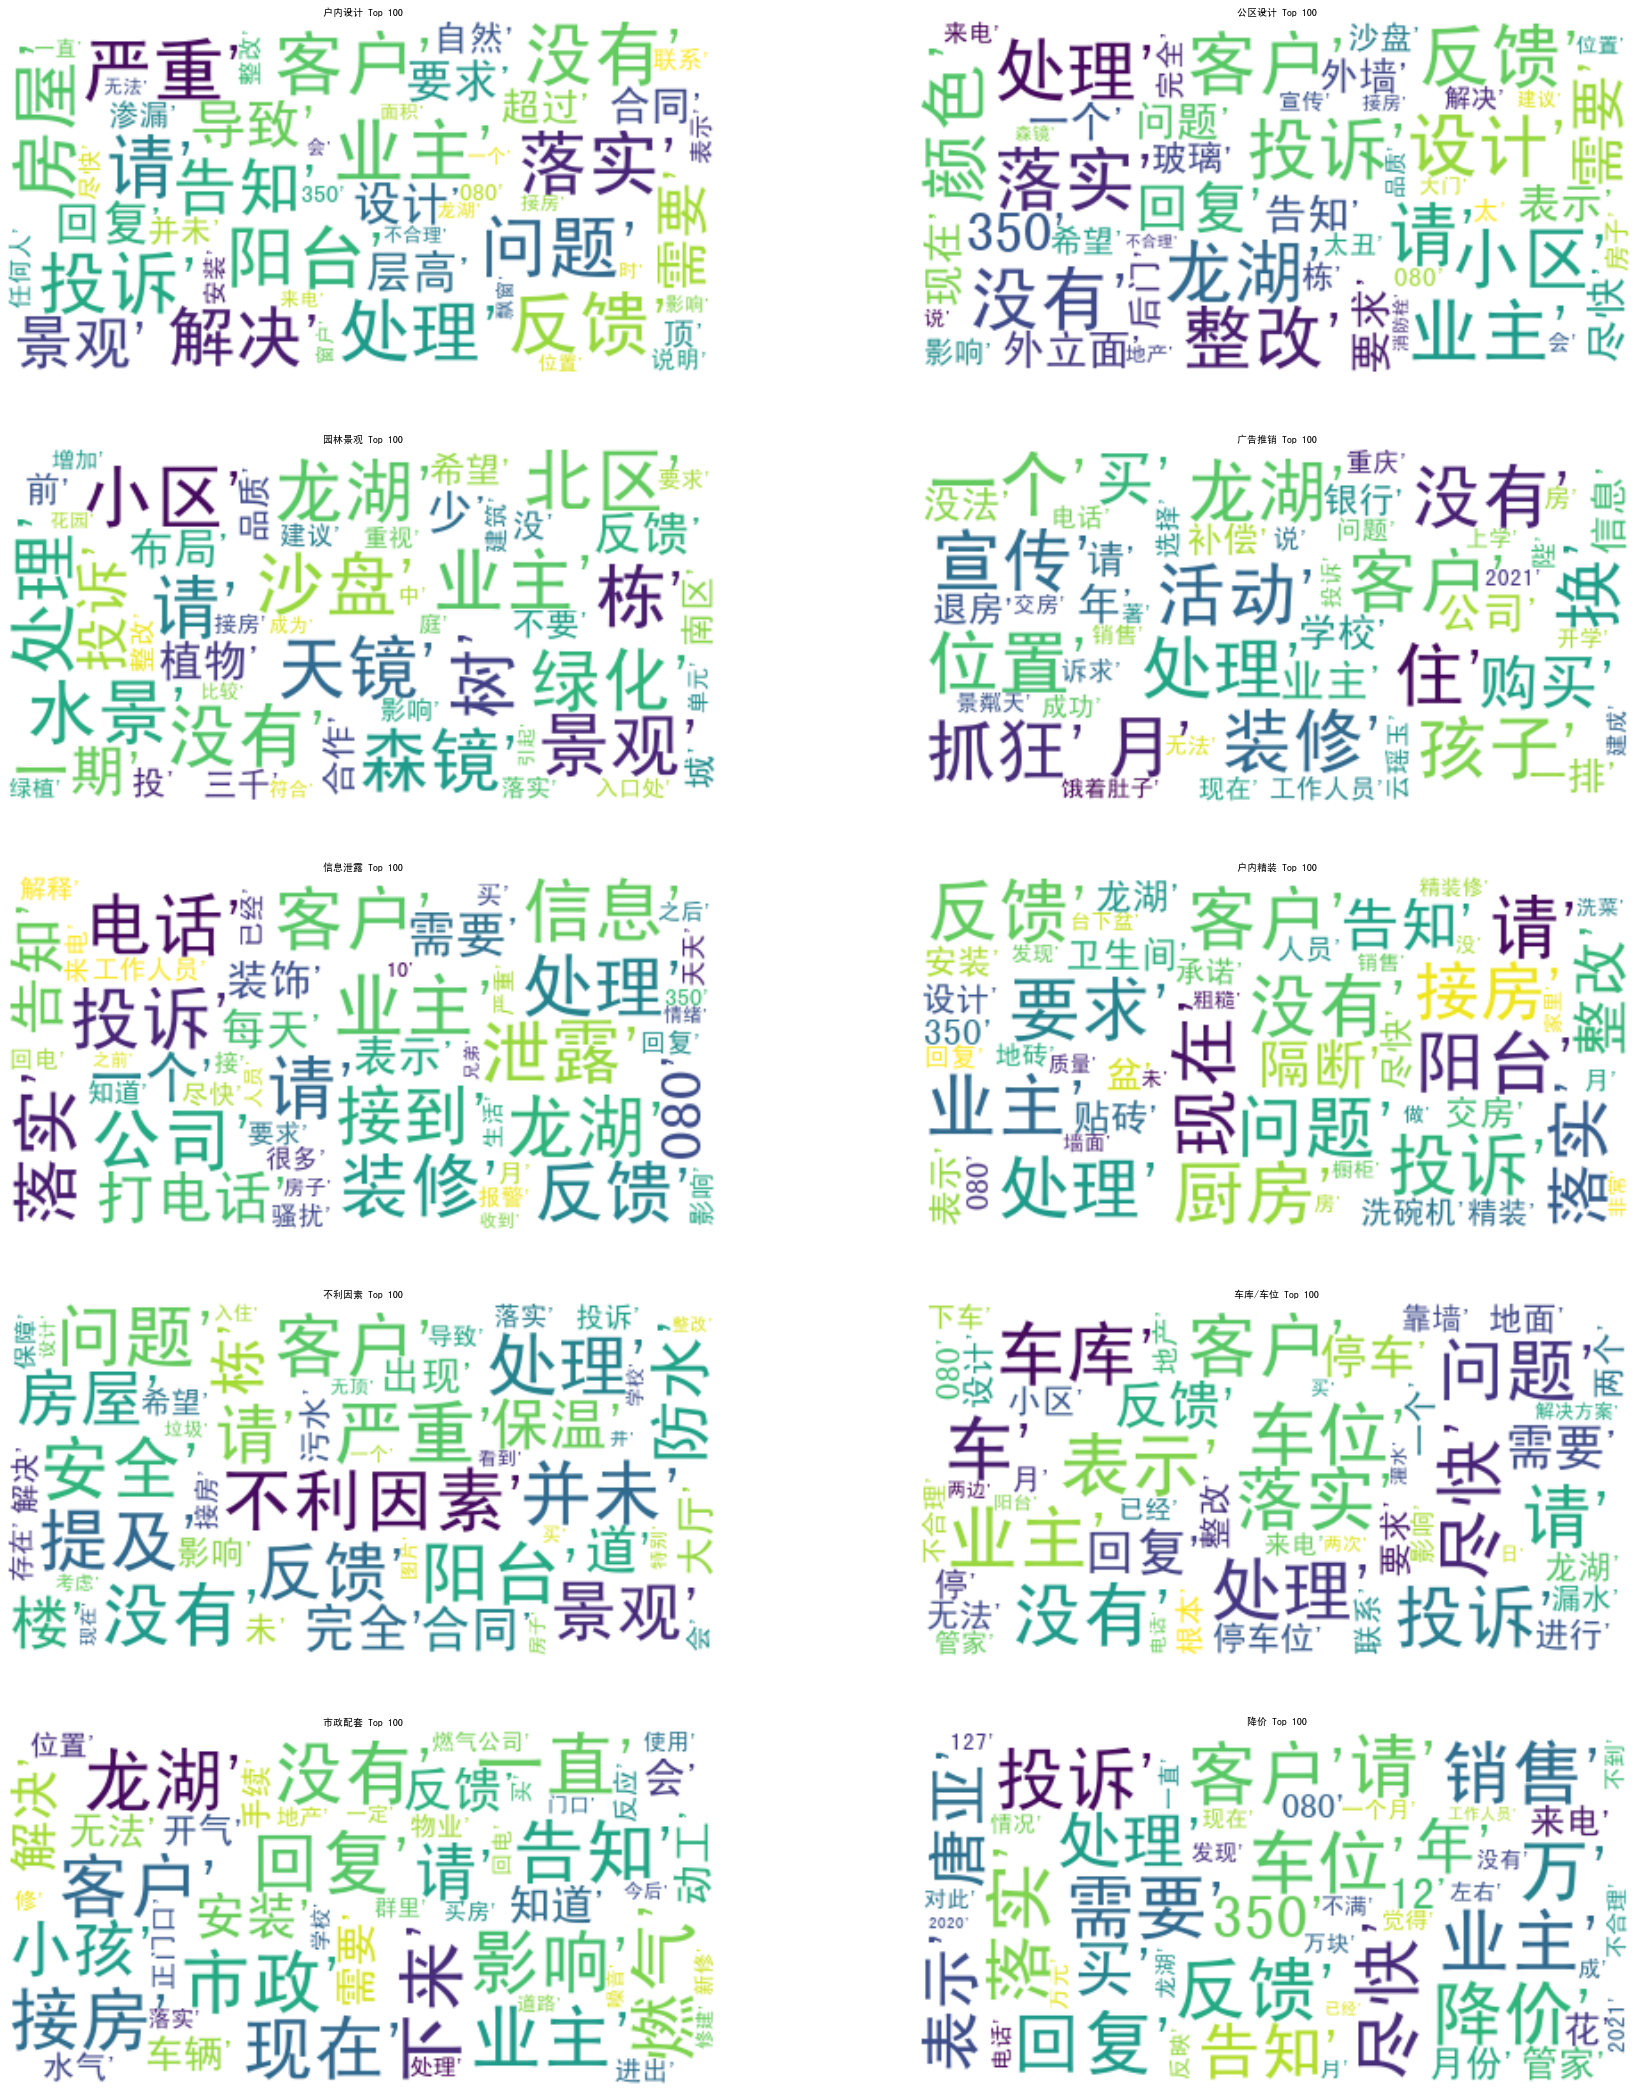

In [340]:
from collections import Counter
from wordcloud import WordCloud
 
def generate_wordcloud(tup):
    wordcloud = WordCloud(background_color='white',
                          font_path='simhei.ttf',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wordcloud
 
cat_desc = dict()
for cat in cat_id_df.cat.values: 
    
    text = df.loc[df['cat']==cat, 'cut_review']
    text = (' '.join(map(str,text))).split(' ')
    cat_desc[cat]=text
    
fig,axes = plt.subplots(5, 2, figsize=(30, 38))
k=0
for i in range(5):
    for j in range(2):
        cat = id_to_cat[k]
        most100=Counter(cat_desc[cat]).most_common(100)
        ax = axes[i, j]
        ax.imshow(generate_wordcloud(most100), interpolation="bilinear")
        ax.axis('off')
        ax.set_title("{} Top 100".format(cat), fontsize=30, fontproperties=zhfont)
        k+=1

In [341]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(df.cut_review)
labels = df.cat_id
print(features.shape)
print('-----------------------------')
print(features)

(797, 15596)
-----------------------------
  (0, 12630)	0.0755535062090332
  (0, 6404)	0.1177534669890361
  (0, 4469)	0.16624099717641674
  (0, 14939)	0.16274616710654538
  (0, 8682)	0.19534392823717758
  (0, 5937)	0.2073747919706788
  (0, 8639)	0.18018683247674552
  (0, 1425)	0.2073747919706788
  (0, 1346)	0.18680789457354777
  (0, 4061)	0.2073747919706788
  (0, 8626)	0.2073747919706788
  (0, 3125)	0.2073747919706788
  (0, 10185)	0.18018683247674552
  (0, 4224)	0.18018683247674552
  (0, 11950)	0.17477703084004656
  (0, 1077)	0.2073747919706788
  (0, 11701)	0.2073747919706788
  (0, 6450)	0.2073747919706788
  (0, 3700)	0.2073747919706788
  (0, 5887)	0.08306035829001142
  (0, 7928)	0.07966560170751834
  (0, 14)	0.08820163537114817
  (0, 4913)	0.064110221297486
  (0, 12625)	0.06776869648995222
  (0, 6390)	0.08793551913999628
  :	:
  (796, 6372)	0.15351919216719848
  (796, 15154)	0.15351919216719848
  (796, 3454)	0.15351919216719848
  (796, 8813)	0.15351919216719848
  (796, 1678)	0.1535191

In [342]:
from sklearn.feature_selection import chi2
import numpy as np
 
N = 2
for cat, cat_id in sorted(cat_to_id.items()):
    features_chi2 = chi2(features, labels == cat_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(cat))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# '不利因素':
  . Most correlated unigrams:
       . 高速路
       . 太吵
  . Most correlated bigrams:
       . 出现 安全
       . 外观 太丑
# '信息泄露':
  . Most correlated unigrams:
       . 公司
       . 装修
  . Most correlated bigrams:
       . 装修 电话
       . 装修 公司
# '公区设计':
  . Most correlated unigrams:
       . 外立面
       . 颜色
  . Most correlated bigrams:
       . 超过 自然
       . 外墙 颜色
# '园林景观':
  . Most correlated unigrams:
       . 绿化
       . 水景
  . Most correlated bigrams:
       . 比较 不够
       . 天镜 一期
# '工程进度':
  . Most correlated unigrams:
       . 更新
       . 工程进度
  . Most correlated bigrams:
       . 工程进度 工地
       . 工程进度 更新
# '市政配套':
  . Most correlated unigrams:
       . 新修
       . 市政
  . Most correlated bigrams:
       . 门口 新修
       . 新修 学校
# '广告推销':
  . Most correlated unigrams:
       . 饿着肚子
       . 抓狂
  . Most correlated bigrams:
       . 没法 保证
       . 抓狂 抓狂
# '户内精装':
  . Most correlated unigrams:
       . 厨房
       . 台下盆
  . Most correlated bigrams:
       . 厨房 台下盆
       . 阳台 要求
# '户

In [379]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
 
X_train, X_test, y_train, y_test = train_test_split(df['cut_review'], df['cat_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
 
clf = MultinomialNB().fit(X_train_tfidf, y_train)


def myPredict(sec):
    format_sec=" ".join([w for w in list(jb.cut(remove_punctuation(sec))) if w not in stopwords])
    pred_cat_id=clf.predict(count_vect.transform([format_sec]))
    print(id_to_cat[pred_cat_id[0]])

In [380]:
toPredict = data
toPredict = toPredict[toPredict['cat']=='其他']
toPredict[toPredict.isnull().values==True]
toPredict = toPredict[pd.notnull(toPredict['review'])]
toPredict['clean_review'] = toPredict['review'].apply(remove_punctuation)
toPredict['cut_review'] = toPredict['clean_review'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
toPredict = toPredict.reset_index()
pred_cat_id=clf.predict(count_vect.transform(toPredict['cut_review']))

def FndVlAccrdIndxLst(AimLst,IndxLst):
    i=0
    RsltLst=[]
    while i<len(IndxLst):
        RsltLst.append(AimLst[IndxLst[i]])
        i=i+1
    return RsltLst

pred_list = FndVlAccrdIndxLst(id_to_cat,pred_cat_id)
prediction = pd.DataFrame({'review':toPredict['review']})
prediction['prediction'] = pred_list


from google.colab import drive
drive.mount('drive')
prediction.to_excel('prediction.xls')
!cp prediction.xls "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [370]:
 prediction

,review,prediction
0,350投诉：客户反馈：购买了2组团1号商铺进行出租，客户和租户产生了纠纷，租户进行起诉，法院...,公区设计
1,该户天棚楼板存在贯穿性开裂，影响业主正常使用（已装修入住），现需发起赔付,户内设计
2,350投诉：未登记客户反馈：自称是龙湖员工销售，4月18日带客户看房成交了，8月份公司告知这...,公区设计
3,户内整改,户内设计
4,户位整改,公区设计
...,...,...
278,本人购入森镜洋房，合同签订后置业顾问梅杰不管不问，当初梅杰说本人直系亲属是春江天镜老业主，可...,公区设计
279,潲水桶放在商业门面前面，又脏又臭 严重影响商业的业绩，请立即搬走,户内设计
280,龙湖春江天境销售人员刘韵，在向我推荐房子时未曾据实介绍，导致我在选户型时被蒙蔽，选错了朝向，...,户内设计
281,350投诉：客户来电投诉因漏水原因导致户内装修被破坏，并且中央空调也进水了无法运行，现在一直...,户内设计


In [381]:
myPredict('1、车库负二层距离狭小，只能单行，无法会车。')

车库/车位
